In [1]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt
import shared

ve_or_ju = "ve"
year = 2019

In [2]:
estimates = pd.read_json(f'web-lib/for_web_{ve_or_ju}_{year}.json', orient="records", convert_dates=["fin_time_median", "fin_time_start95", "fin_time_end95"])



In [3]:
estimates.head().round(3)

team_id  leg                   team                name  num_runs  \
0        1    1        Stora Tuna OK 1       Tilda Östberg         1   
1        1    2        Stora Tuna OK 1    Magdalena Olsson         7   
2        1    3        Stora Tuna OK 1         Julia Jakob         1   
3        1    4        Stora Tuna OK 1  Tove Alexandersson         7   
4        2    1  Göteborg Majorna OK 1      Amanda Hansson         2   

   ind_log_mean  ind_log_std  personal_start95  personal_median  \
0         1.886        0.111            31.764           39.564   
1         1.959        0.082            34.487           40.512   
2         1.782        0.154            32.132           43.358   
3         1.796        0.068            41.737           47.658   
4         2.005        0.086            37.615           44.637   

   personal_end95  fin_sum_log_mean  fin_sum_log_std  \
0          49.035             3.677            0.111   
1          47.505             4.385            0.069   
2          58.329             4.820            0.071   
3          54.537             5.146            0.054   
4          53.023             3.798            0.087   

                  fin_time_start95                   fin_time_end95  \
0 2019-06-15 11:31:45.860000+00:00 2019-06-15 11:49:02.126000+00:00   
1 2019-06-15 12:09:53.142000+00:00 2019-06-15 12:31:49.723000+00:00   
2 2019-06-15 12:48:01.880000+00:00 2019-06-15 13:22:23.615000+00:00   
3 2019-06-15 13:34:24.882000+00:00 2019-06-15 14:10:57.073000+00:00   
4 2019-06-15 11:37:36.897000+00:00 2019-06-15 11:53:01.364000+00:00   

                   fin_time_median  mass_start  dark_during_leg  
0 2019-06-15 11:39:33.850000+00:00         0.0                0  
1 2019-06-15 12:20:16.454000+00:00         0.0                0  
2 2019-06-15 13:03:52.142000+00:00         0.0                0  
3 2019-06-15 13:51:43.747000+00:00         0.0                0  
4 2019-06-15 11:44:38.232000+00:00         0.0                0

In [4]:
display(estimates.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6728 entries, 0 to 6727
Data columns (total 17 columns):
team_id             6728 non-null int64
leg                 6728 non-null int64
team                6728 non-null object
name                6728 non-null object
num_runs            6728 non-null int64
ind_log_mean        6728 non-null float64
ind_log_std         6728 non-null float64
personal_start95    6728 non-null float64
personal_median     6728 non-null float64
personal_end95      6728 non-null float64
fin_sum_log_mean    6728 non-null float64
fin_sum_log_std     6728 non-null float64
fin_time_start95    6728 non-null datetime64[ns, UTC]
fin_time_end95      6728 non-null datetime64[ns, UTC]
fin_time_median     6728 non-null datetime64[ns, UTC]
mass_start          6728 non-null float64
dark_during_leg     6728 non-null int64
dtypes: datetime64[ns, UTC](3), float64(8), int64(4), object(2)
memory usage: 893.7+ KB


None

In [5]:
# Read the actual times after race and analyze estimates

results = pd.read_csv(f'data/results_with_dist_j{year}_{ve_or_ju}.tsv', delimiter="\t")
display(results.head().round(2))
results = results[["team-id", "leg-nro", "leg-time", "leg_distance"]]
results["leg-time"] = results["leg-time"] / 60
results = results.rename(index=str, columns={"team-id": "team_id", "leg-nro": "leg"})
results.head().round(3)

team-id  placement  team-time       team-name  team-nro  leg-nro  \
0       22        1.0     9917.0  Fredrikstad SK         1        1   
1       22        1.0     9917.0  Fredrikstad SK         1        2   
2       22        1.0     9917.0  Fredrikstad SK         1        3   
3       22        1.0     9917.0  Fredrikstad SK         1        4   
4       19        2.0    10138.0    IFK Göteborg         1        1   

        emit  leg-time            competitor-name  weighted_log_mean_pace  \
0  1237786.0    2325.0  Marianne Riddervold Kahrs                    1.85   
1  1509400.0    2136.0             Marie Olaussen                    1.83   
2  1509422.0    2595.0          Marianne Andersen                    1.77   
3  1509399.0    2860.0           Kamilla Olaussen                    1.78   
4  1217441.0    2314.0           Miri Thrane Ödum                    1.83   

   weighted_log_pace_std  disqualified  leg_distance  
0                   0.25         False           6.0  
1                   0.25         False           5.7  
2                   0.19         False           7.3  
3                   0.22         False           7.9  
4                   0.26         False           6.0

team_id  leg  leg-time  leg_distance
0       22    1    38.750           6.0
1       22    2    35.600           5.7
2       22    3    43.250           7.3
3       22    4    47.667           7.9
4       19    1    38.567           6.0

In [6]:

with_result = pd.merge(estimates, results, how='left', on=['team_id', 'leg'])
with_result = with_result[np.isfinite(with_result["leg-time"])]

In [7]:
with_result.head().round(3)


team_id  leg                   team                name  num_runs  \
0        1    1        Stora Tuna OK 1       Tilda Östberg         1   
1        1    2        Stora Tuna OK 1    Magdalena Olsson         7   
2        1    3        Stora Tuna OK 1         Julia Jakob         1   
3        1    4        Stora Tuna OK 1  Tove Alexandersson         7   
4        2    1  Göteborg Majorna OK 1      Amanda Hansson         2   

   ind_log_mean  ind_log_std  personal_start95  personal_median  \
0         1.886        0.111            31.764           39.564   
1         1.959        0.082            34.487           40.512   
2         1.782        0.154            32.132           43.358   
3         1.796        0.068            41.737           47.658   
4         2.005        0.086            37.615           44.637   

   personal_end95  fin_sum_log_mean  fin_sum_log_std  \
0          49.035             3.677            0.111   
1          47.505             4.385            0.069   
2          58.329             4.820            0.071   
3          54.537             5.146            0.054   
4          53.023             3.798            0.087   

                  fin_time_start95                   fin_time_end95  \
0 2019-06-15 11:31:45.860000+00:00 2019-06-15 11:49:02.126000+00:00   
1 2019-06-15 12:09:53.142000+00:00 2019-06-15 12:31:49.723000+00:00   
2 2019-06-15 12:48:01.880000+00:00 2019-06-15 13:22:23.615000+00:00   
3 2019-06-15 13:34:24.882000+00:00 2019-06-15 14:10:57.073000+00:00   
4 2019-06-15 11:37:36.897000+00:00 2019-06-15 11:53:01.364000+00:00   

                   fin_time_median  mass_start  dark_during_leg  leg-time  \
0 2019-06-15 11:39:33.850000+00:00         0.0                0    47.417   
1 2019-06-15 12:20:16.454000+00:00         0.0                0    37.050   
2 2019-06-15 13:03:52.142000+00:00         0.0                0    44.117   
3 2019-06-15 13:51:43.747000+00:00         0.0                0    46.200   
4 2019-06-15 11:44:38.232000+00:00         0.0                0    40.483   

   leg_distance  
0           6.0  
1           5.7  
2           7.3  
3           7.9  
4           6.0

In [8]:
with_result["ind_leg_time_estimate"] = np.exp(with_result["ind_log_mean"]) * with_result["leg_distance"]

In [9]:
with_result["ind_error"] = np.abs(with_result["ind_leg_time_estimate"] - with_result["leg-time"])
with_result["ind_error_ratio"] = with_result["ind_error"] / with_result["leg-time"]
with_result["ind_interval_error"] = (with_result["personal_start95"] > with_result["leg-time"]) | (with_result["personal_end95"] < with_result["leg-time"])


In [10]:
with_result.sort_values(by=['ind_error']).tail(10).round(2)

team_id  leg                                        team  \
6535     1671    4                             Team Persikka 1   
5292     1353    1                    Riihimäen Suunnistajat 3   
4211     1072    4                              Rasti-Perniö 2   
6260     1602    1                       Ota kiinni jos saat 1   
5811     1486    4  Paha rasti - etsikää meidät ennen pimeää 2   
5889     1507    2                               Ukkoskyykky 1   
6433     1646    2                                Harharetki 1   
4774     1219    3                         Hiukkasen Hukassa 1   
5621     1438    2                      Valiokerho Jyväskylä 1   
6158     1576    3                                   Basware 1   

                     name  num_runs  ind_log_mean  ind_log_std  \
6535        Leena Kilpelä         0          2.71         0.18   
5292  Marja-Liisa Liminka         0          2.55         0.18   
4211       Lotta Tamminen         6          2.72         0.15   
6260       Virpi Kokkonen         0          2.48         0.20   
5811          Annika Mäki         0          2.52         0.19   
5889        Iines Piesala         0          2.71         0.21   
6433      Johanna Latikka         0          2.71         0.18   
4774        Siiri Pietilä         1          2.51         0.25   
5621     Leena Vähä-Maahi         7          2.89         0.16   
6158     Kristiina Kuisma         0          2.45         0.20   

      personal_start95  personal_median  personal_end95  ...  \
6535             82.68           118.60          170.74  ...   
5292             53.82            76.73          109.87  ...   
4211             88.27           119.18          161.16  ...   
6260             48.70            72.14          106.34  ...   
5811             67.85            98.19          141.52  ...   
5889             57.08            85.48          128.47  ...   
6433             60.01            85.53          122.05  ...   
4774             55.16            90.00          145.26  ...   
5621             75.80           102.40          139.36  ...   
6158             57.48            84.56          123.66  ...   

                       fin_time_end95                  fin_time_median  \
6535 2019-06-15 19:08:00.700000+00:00 2019-06-15 17:45:21.735000+00:00   
5292 2019-06-15 12:49:52.279000+00:00 2019-06-15 12:16:44.050000+00:00   
4211 2019-06-15 18:01:51.810000+00:00 2019-06-15 17:00:59.290000+00:00   
6260 2019-06-15 12:46:20.659000+00:00 2019-06-15 12:12:08.272000+00:00   
5811 2019-06-15 18:29:16.558000+00:00 2019-06-15 17:14:02.565000+00:00   
5889 2019-06-15 14:39:56.113000+00:00 2019-06-15 13:47:53.344000+00:00   
6433 2019-06-15 14:49:10.594000+00:00 2019-06-15 13:56:55.179000+00:00   
4774 2019-06-15 16:30:23.904000+00:00 2019-06-15 15:11:13.318000+00:00   
5621 2019-06-15 14:47:30.829000+00:00 2019-06-15 14:08:35.806000+00:00   
6158 2019-06-15 16:28:37.826000+00:00 2019-06-15 15:30:56.325000+00:00   

     mass_start dark_during_leg leg-time  leg_distance  ind_leg_time_estimate  \
6535       0.69               0   201.98           7.9                 118.50   
5292       0.00               0   167.20           6.0                  76.70   
4211       0.10               0   211.48           7.9                 119.46   
6260       0.00               0   164.88           6.0                  71.95   
5811       0.56               0   195.40           7.9                  97.94   
5889       0.00               0   183.43           5.7                  85.50   
6433       0.00               0   187.03           5.7                  85.50   
4774       0.00               0   193.93           7.3                  90.15   
5621       0.00               0   212.15           5.7                 102.60   
6158       0.00               0   205.63           7.3                  84.60   

      ind_error  ind_error_ratio  ind_interval_error  
6535      83.48             0.41                True  
5292      90.50             0.

In [11]:
reports = [f'Yksilöennusteen keskivirhe: {np.mean(with_result["ind_error"]).round(3)} minuuttia',
              f'Yksilöennusteen mediaanivirhe: {np.median(with_result["ind_error"]).round(3)} minuuttia',
           f'Yksilön aikaväliennuste väärin: {np.mean(with_result["ind_interval_error"]).round(4) * 100} %']

display(reports)  

['Yksilöennusteen keskivirhe: 9.309 minuuttia',
 'Yksilöennusteen mediaanivirhe: 6.394 minuuttia',
 'Yksilön aikaväliennuste väärin: 4.87 %']

In [12]:
with_result["ind_interval"] = with_result["personal_end95"] - with_result["personal_start95"]


In [13]:
ind_by_num_runs = with_result[["num_runs", "ind_interval", 'ind_error', 'ind_interval_error']].groupby('num_runs').agg({'ind_interval': ["mean", "median"], 'ind_error': ["mean", "median"], 'ind_interval_error': ["mean", "count"]}).round(2)
reports.append(ind_by_num_runs.to_string())
ind_by_num_runs

ind_interval        ind_error        ind_interval_error      
                 mean median      mean median               mean count
num_runs                                                              
0               65.33  63.21     13.50  10.23               0.06  1592
1               61.52  61.32     10.31   6.91               0.04   995
2               57.90  56.04      9.94   7.56               0.02   715
3               55.89  53.03      8.38   6.40               0.03   687
4               32.80  27.87      7.26   5.67               0.07   548
5               35.26  30.41      7.23   5.32               0.09   559
6               33.62  30.29      6.37   4.38               0.05   548
7               32.72  29.78      5.69   4.08               0.05   562
8               32.24  29.30      5.24   3.66               0.03   380
9               36.38  36.38      6.07   6.07               0.00     2
10              16.69  16.69      3.56   3.56               0.00     1

In [14]:
with_result[["leg", 'ind_error', 'ind_interval_error', "num_runs"]].groupby('leg').agg(["mean", "median", "count"]).round(2)

ind_error              ind_interval_error              num_runs         \
         mean median count               mean median count     mean median   
leg                                                                          
1        8.00   5.78  1673               0.05  False  1673     2.98      2   
2        8.52   5.55  1654               0.05  False  1654     2.76      2   
3       10.51   7.18  1641               0.05  False  1641     3.01      3   
4       10.25   7.41  1621               0.04  False  1621     3.26      3   

           
    count  
leg        
1    1673  
2    1654  
3    1641  
4    1621

In [15]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
// # To disable auto-scrolling, execute this javascript in a notebook cell before other cells are executed:

<IPython.core.display.Javascript object>

(0, 20.98626676671548)

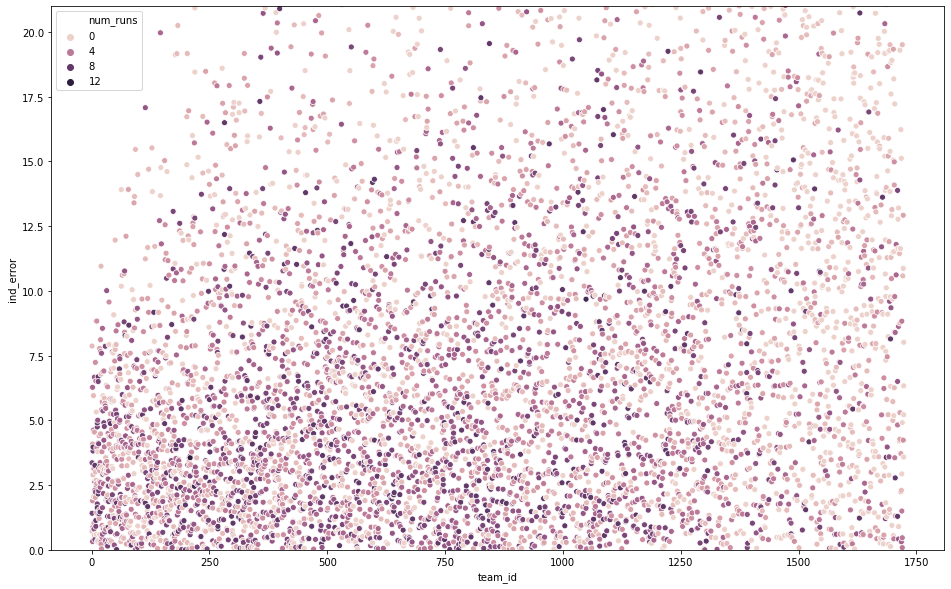

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
plot = sns.scatterplot(x="team_id", y="ind_error", hue="num_runs", data=with_result)
plot.axes.set_ylim(0, with_result.ind_error.quantile(0.9))


(27.75, 111.9733333333333)

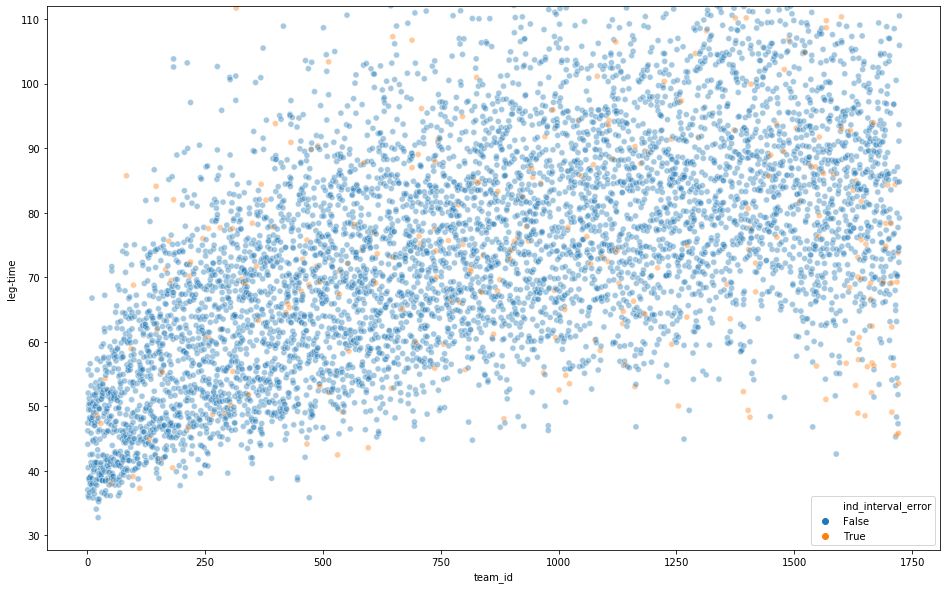

In [17]:
plt.figure(figsize=(16, 10))
plot = sns.scatterplot(x="team_id", y="leg-time", hue="ind_interval_error", alpha=0.4, data=with_result)
plot.axes.set_ylim(with_result["leg-time"].min() - 5, with_result["leg-time"].quantile(0.95))

(27.75, 101.70333333333333)

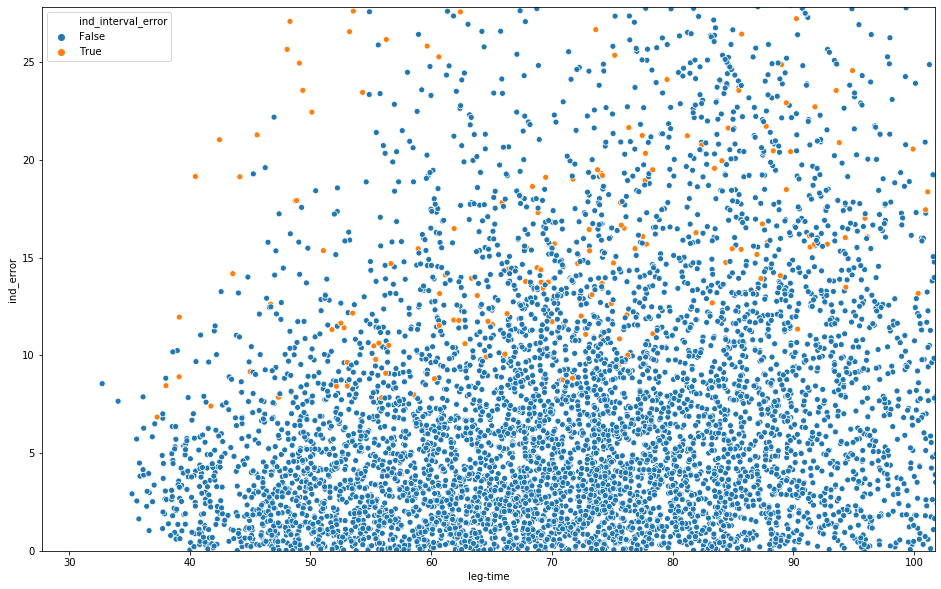

In [18]:
plt.figure(figsize=(16, 10))
plot = sns.scatterplot(x="leg-time", y="ind_error", hue="ind_interval_error", data=with_result)
plot.axes.set_ylim(0, with_result.ind_error.quantile(0.95))
plot.axes.set_xlim(with_result["leg-time"].min() - 5, with_result["leg-time"].quantile(0.9))

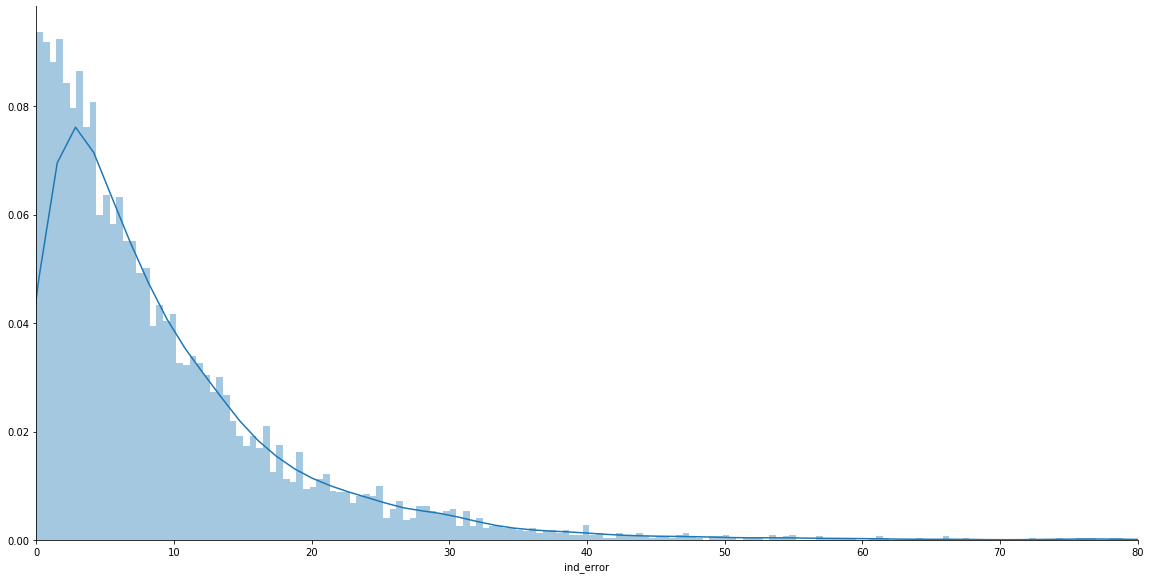

In [19]:
g = sns.FacetGrid(with_result, height=8, aspect=2, xlim=(0,80), margin_titles=True, despine=True)
#g.map(sns.distplot, "ind_error", hist_kws={'alpha':0.8}).add_legend()
sns.distplot(with_result.ind_error, bins=250, kde=True)

In [20]:
with_result["capped_num_runs"] = np.clip(with_result.num_runs, 1, shared.num_pace_years + 1)


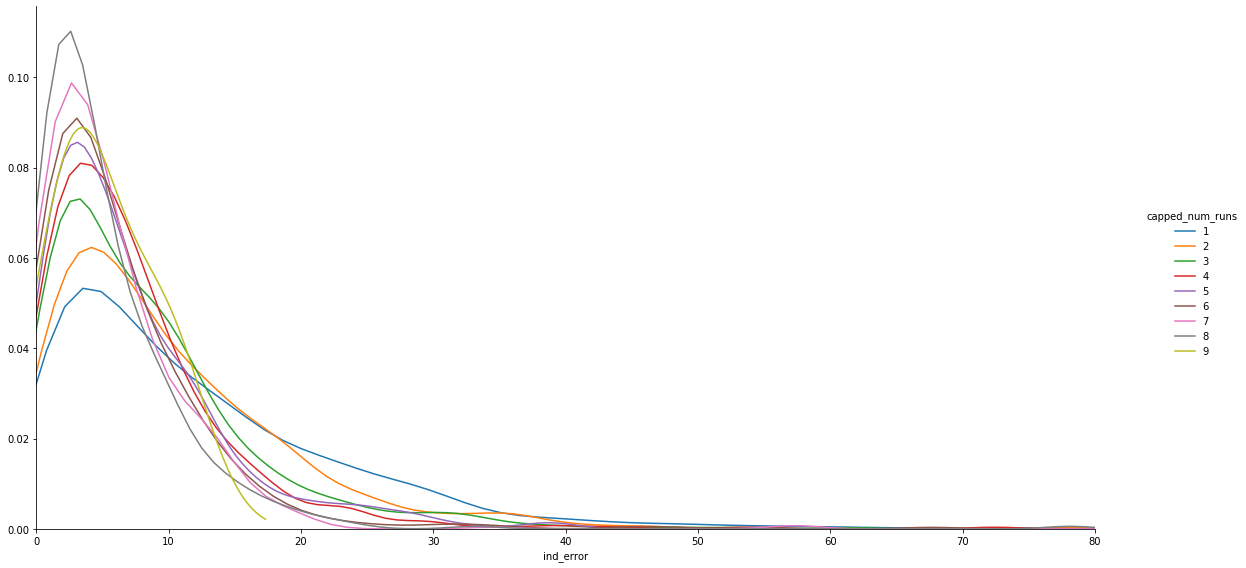

In [21]:
g = sns.FacetGrid(with_result, hue="capped_num_runs", height=8, aspect=2, xlim=(0,80), margin_titles=True, despine=True)
g.map(sns.distplot, "ind_error", hist=False, hist_kws={'alpha':0.8}).add_legend()

In [22]:
def calculate_relay_values(result_row):
    rows_so_far = with_result[(with_result.team_id == result_row.team_id) & (with_result["leg"] <= result_row["leg"])]

    return pd.Series({"real_relay_time": np.sum(rows_so_far["leg-time"]), "mean_num_runs": np.mean(rows_so_far["num_runs"]).round(0)})

relay_values = with_result.apply(lambda row: calculate_relay_values(row), axis=1)

with_result["real_relay_time"] = relay_values["real_relay_time"]
with_result["mean_num_runs"] = relay_values["mean_num_runs"]



In [23]:
with_result["relay_error"] = np.abs(np.exp(with_result["fin_sum_log_mean"]) - with_result["real_relay_time"])
with_result["relay_error_ratio"] = with_result["relay_error"] / with_result["real_relay_time"]

In [24]:
display(np.mean(with_result["relay_error"]))
display(np.mean(with_result["relay_error_ratio"]))

16.59328699889085

0.09487772417681171

In [25]:
reports.append(f'Viestiennusteen keskivirhe: {np.mean(with_result["relay_error"]).round(3)} minuuttia')  
reports.append(f'Viestiennusteen virheen mediaani: {np.median(with_result["relay_error"]).round(3)} minuuttia')  
display(reports)               

['Yksilöennusteen keskivirhe: 9.309 minuuttia',
 'Yksilöennusteen mediaanivirhe: 6.394 minuuttia',
 'Yksilön aikaväliennuste väärin: 4.87 %',
 '         ind_interval        ind_error        ind_interval_error      \n                 mean median      mean median               mean count\nnum_runs                                                              \n0               65.33  63.21     13.50  10.23               0.06  1592\n1               61.52  61.32     10.31   6.91               0.04   995\n2               57.90  56.04      9.94   7.56               0.02   715\n3               55.89  53.03      8.38   6.40               0.03   687\n4               32.80  27.87      7.26   5.67               0.07   548\n5               35.26  30.41      7.23   5.32               0.09   559\n6               33.62  30.29      6.37   4.38               0.05   548\n7               32.72  29.78      5.69   4.08               0.05   562\n8               32.24  29.30      5.24   3.66               0.03

In [26]:
reports.append(with_result[["leg", 'relay_error']].groupby('leg').agg(["mean", "median", "count"]).round(2).to_string())
display(reports)

['Yksilöennusteen keskivirhe: 9.309 minuuttia',
 'Yksilöennusteen mediaanivirhe: 6.394 minuuttia',
 'Yksilön aikaväliennuste väärin: 4.87 %',
 '         ind_interval        ind_error        ind_interval_error      \n                 mean median      mean median               mean count\nnum_runs                                                              \n0               65.33  63.21     13.50  10.23               0.06  1592\n1               61.52  61.32     10.31   6.91               0.04   995\n2               57.90  56.04      9.94   7.56               0.02   715\n3               55.89  53.03      8.38   6.40               0.03   687\n4               32.80  27.87      7.26   5.67               0.07   548\n5               35.26  30.41      7.23   5.32               0.09   559\n6               33.62  30.29      6.37   4.38               0.05   548\n7               32.72  29.78      5.69   4.08               0.05   562\n8               32.24  29.30      5.24   3.66               0.03

(0, 54.89090585568566)

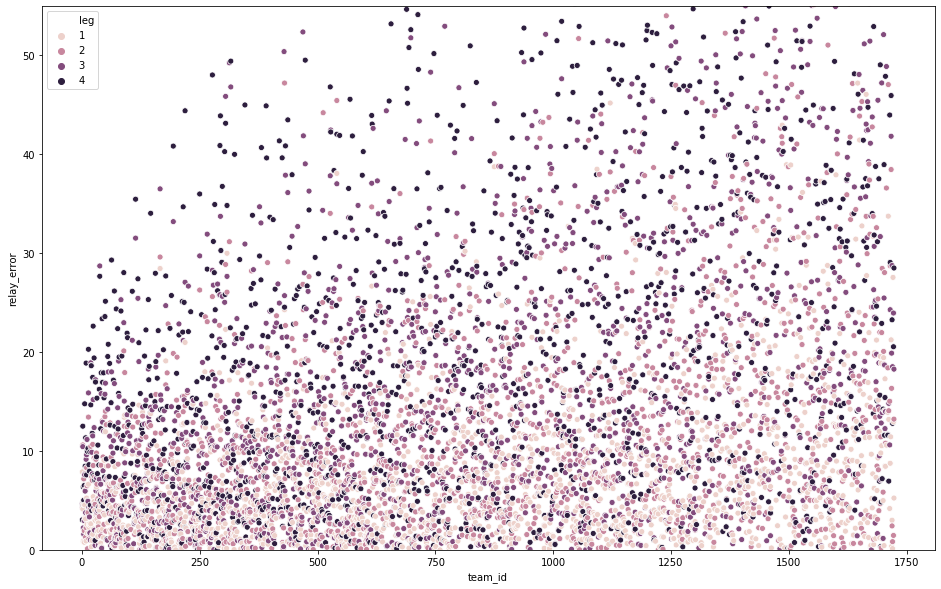

In [27]:
plt.figure(figsize=(16, 10))
plot = sns.scatterplot(x="team_id", y="relay_error", hue="leg", data=with_result)
plot.axes.set_ylim(0, with_result.relay_error.quantile(0.95))


(0, 54.89090585568566)

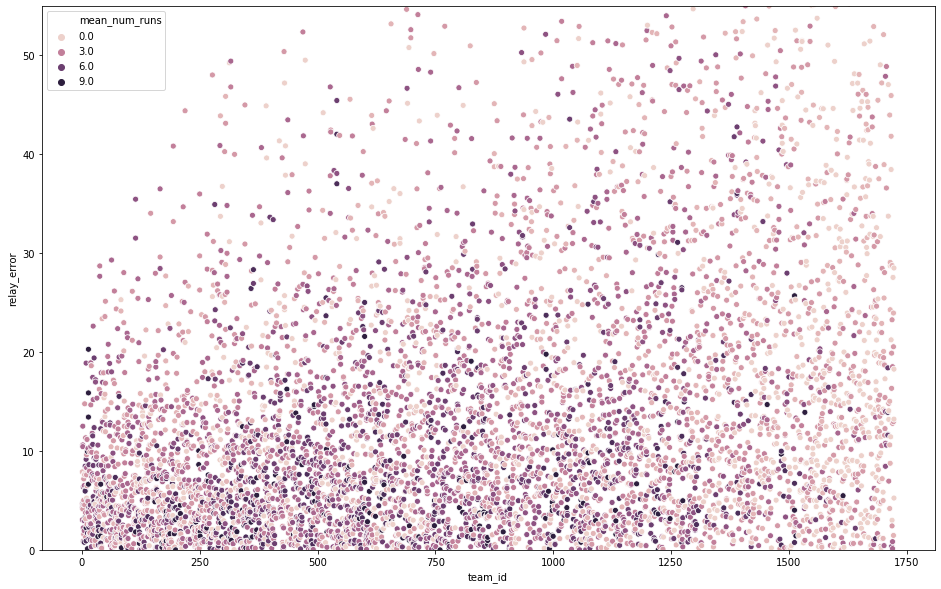

In [28]:
plt.figure(figsize=(16, 10))
plot = sns.scatterplot(x="team_id", y="relay_error", hue="mean_num_runs", data=with_result)
plot.axes.set_ylim(0, with_result.relay_error.quantile(0.95))

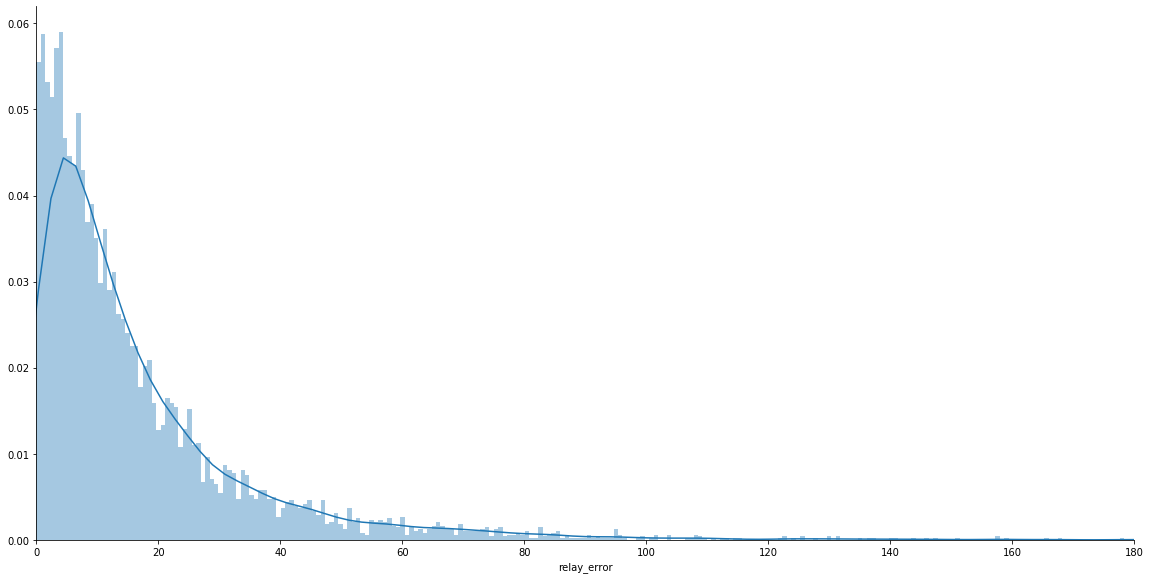

In [29]:
g = sns.FacetGrid(with_result, hue="leg", height=8, aspect=2, xlim=(0,180), margin_titles=True, despine=True)
sns.distplot(with_result.relay_error, bins=250, kde=True)

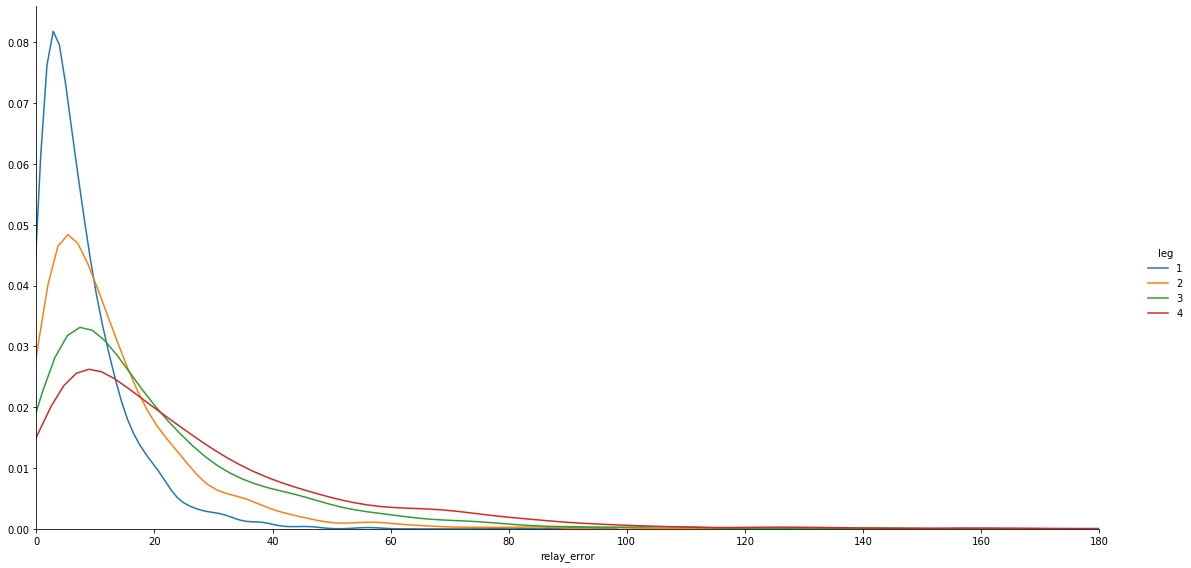

In [30]:
g = sns.FacetGrid(with_result, hue="leg", height=8, aspect=2, xlim=(0,180), margin_titles=True, despine=True)
g.map(sns.distplot, "relay_error", hist=False, hist_kws={'alpha':0.8}).add_legend()

In [31]:
with_result["real_finish_time"] = pd.to_timedelta(with_result["real_relay_time"], unit="min") + shared.start_timestamp[ve_or_ju][year]

with_result["real_interval_error"] = (with_result["real_finish_time"] < with_result["fin_time_start95"]) | (with_result["real_finish_time"] > with_result["fin_time_end95"])
with_result["real_interval_error_fast"] = (with_result["real_finish_time"] < with_result["fin_time_start95"])
with_result["real_interval_error_slow"] = (with_result["real_finish_time"] > with_result["fin_time_end95"])
np.mean(with_result["real_interval_error"])

reports.append(f'Viestin aikaväliennuste väärin: {np.mean(with_result["real_interval_error"]).round(3) * 100} %')
display(reports)

['Yksilöennusteen keskivirhe: 9.309 minuuttia',
 'Yksilöennusteen mediaanivirhe: 6.394 minuuttia',
 'Yksilön aikaväliennuste väärin: 4.87 %',
 '         ind_interval        ind_error        ind_interval_error      \n                 mean median      mean median               mean count\nnum_runs                                                              \n0               65.33  63.21     13.50  10.23               0.06  1592\n1               61.52  61.32     10.31   6.91               0.04   995\n2               57.90  56.04      9.94   7.56               0.02   715\n3               55.89  53.03      8.38   6.40               0.03   687\n4               32.80  27.87      7.26   5.67               0.07   548\n5               35.26  30.41      7.23   5.32               0.09   559\n6               33.62  30.29      6.37   4.38               0.05   548\n7               32.72  29.78      5.69   4.08               0.05   562\n8               32.24  29.30      5.24   3.66               0.03

In [32]:
display(np.mean(with_result["real_interval_error_fast"]))
display(np.mean(with_result["real_interval_error_slow"]))



0.03824556078312339

0.033085445439368644

In [33]:
with_result["real_interval"] = with_result["fin_time_end95"] - with_result["fin_time_start95"]
with_result["real_interval"] =  pd.to_timedelta(with_result["real_interval"].values).total_seconds() / 60


In [34]:




reports.append(with_result[["leg", 'real_interval', 'real_interval_error', 'real_interval_error_fast', 'real_interval_error_slow']].groupby('leg').agg(["mean"]).round(3).to_string())
display(reports)

['Yksilöennusteen keskivirhe: 9.309 minuuttia',
 'Yksilöennusteen mediaanivirhe: 6.394 minuuttia',
 'Yksilön aikaväliennuste väärin: 4.87 %',
 '         ind_interval        ind_error        ind_interval_error      \n                 mean median      mean median               mean count\nnum_runs                                                              \n0               65.33  63.21     13.50  10.23               0.06  1592\n1               61.52  61.32     10.31   6.91               0.04   995\n2               57.90  56.04      9.94   7.56               0.02   715\n3               55.89  53.03      8.38   6.40               0.03   687\n4               32.80  27.87      7.26   5.67               0.07   548\n5               35.26  30.41      7.23   5.32               0.09   559\n6               33.62  30.29      6.37   4.38               0.05   548\n7               32.72  29.78      5.69   4.08               0.05   562\n8               32.24  29.30      5.24   3.66               0.03

In [35]:
by_num_runs = with_result[["mean_num_runs", "real_interval", 'real_interval_error', 'real_interval_error_fast', 'real_interval_error_slow']].groupby('mean_num_runs').agg(["mean"]).round(3)
reports.append(by_num_runs.to_string())
by_num_runs

real_interval real_interval_error real_interval_error_fast  \
                       mean                mean                     mean   
mean_num_runs                                                              
0.0                  84.951               0.121                    0.065   
1.0                  91.047               0.065                    0.037   
2.0                  88.038               0.066                    0.049   
3.0                  78.981               0.059                    0.038   
4.0                  67.715               0.060                    0.030   
5.0                  62.028               0.076                    0.030   
6.0                  50.823               0.053                    0.010   
7.0                  40.722               0.043                    0.011   
8.0                  34.683               0.035                    0.018   

              real_interval_error_slow  
                                  mean  
mean_num_runs                           
0.0                              0.057  
1.0                              0.028  
2.0                              0.016  
3.0                              0.022  
4.0                              0.029  
5.0                              0.046  
6.0                              0.044  
7.0                              0.032  
8.0                              0.018

In [36]:
shared.write_simple_text_report(reports, f'post_race_analysis_{ve_or_ju}.txt')

(31.43333333333333, 452.19233333333403)

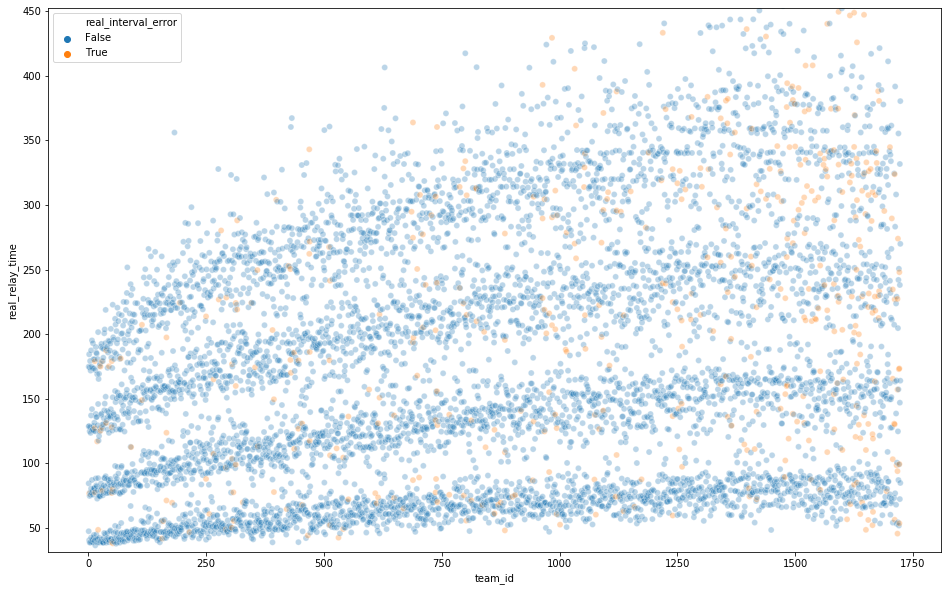

In [37]:
#out_of_interval = with_result[with_result["real_interval_error"]]
plt.figure(figsize=(16, 10))
plot = sns.scatterplot(x="team_id", y="real_relay_time", hue="real_interval_error", alpha=0.3, data=with_result)
plot.axes.set_ylim(with_result.real_relay_time.min() - 5, with_result.real_relay_time.quantile(0.995))

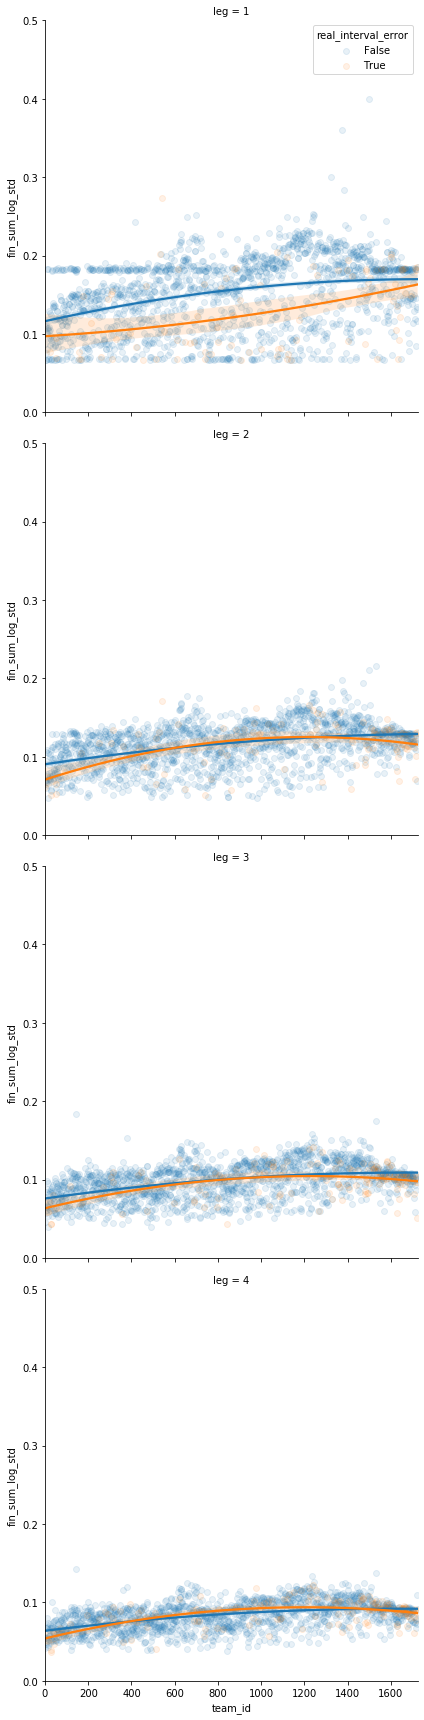

In [38]:
g = sns.FacetGrid(with_result, row="leg", hue="real_interval_error", xlim=(0,with_result.team_id.max()), ylim=(0,0.5), height=6, aspect=1, legend_out=False)
g.map(sns.regplot, "team_id", "fin_sum_log_std", scatter_kws={'alpha':0.1}, order=2).add_legend()
